<a href="https://colab.research.google.com/github/RedeemerNtumy/JCPennyConsultancyProject/blob/master/3549063_BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Stirling

# ITNPBD2 Representing and Manipulating Data

# Assignment Autumn 2025

# A Consultancy Job for JC Penney



### Introduction
The first step to take is to actually explore the dataset, find the useful information and then think of the great insights we can get for JCPenney


In [102]:
#Importing the necessary packages needed for data exploration and manipulation
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

Now that the packages are installed, I can now move ahead and read the necessary files

In [103]:
# Starting with the products dataset
products = pd.read_csv("products.csv")
products_json = pd.read_json("jcpenney_products.json", lines= True) # Setting Lines to true to it reads each line as a json object

In [104]:
# reviews = pd.read_csv("reviews.csv")

Now that the respective data has been loaded, I can now explore it a bit. I will start off by exploring the products dataset to see what useful information I can get from here


## Products

In [105]:
# View structure without loading whole data
products.head(3)

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625


In [106]:
# Checking the dimension of the dataset
products.shape

(7982, 6)

This dataset has 7982 rows and 6 columns

In [107]:
# Getting a summarised description of the data
products.describe()

,Price,Av_Score
count,5816.000000,7982.000000
mean,144.776618,2.988683
std,499.223719,0.911673
min,-65.270000,1.000000
25%,40.700000,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


The dataset has some interesting features like the Name of the product, the price, and the SKU. I would have to view the rest of the data in order to understand how best I can utilize the dataset.

However It's quite surprising to find a negative price. I would have to check the data a bit more to find out if there are more occurences of this.

In [108]:
# Creating a copy of the initial dataset for data intergrity
updated_products = products.copy()

### Negative value in product price

In [109]:
#Checking the number of affected rows
len(updated_products[updated_products["Price"]<0])

44

There are 44 rows that have a negative price. I would correct this by finding the absolute values of the negative entries in the table

In [110]:
updated_products["Price"] = abs(updated_products["Price"])
updated_products.describe() # Verifying that negative prices are removed

,Price,Av_Score
count,5816.000000,7982.000000
mean,145.424555,2.988683
std,499.035327,0.911673
min,8.010000,1.000000
25%,41.042500,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


In [111]:
# Checking for null values
updated_products.isna().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


In [112]:
# Filling all null SKU values with "MISSING_SKU"
updated_products["SKU"] = updated_products["SKU"].fillna("MISSING_SKU")

In [113]:
# Get the counts for the top 10 SKUs
top_10_sku_counts = updated_products['SKU'].value_counts().nlargest(10)

In [114]:
# Replace SKU with the most frequent product name for plotting, keep 'MISSING_SKU'
plot_labels = [
    "MISSING_SKU" if sku == "MISSING_SKU"
    else updated_products[updated_products['SKU'] == sku]['Name'].value_counts().index[0]
    for sku in top_10_sku_counts.index
]

In [115]:
# Creating a reusable plot function
def plot_top_distribution(data, title, xlabel, ylabel, is_series=True, labels=None, values=None):
    """
    Plots a bar chart of the top items in a dataset.

    Parameters:
    - data: pandas Series or any data used for plotting
    - title: str, chart title
    - xlabel: str, label for the x-axis
    - ylabel: str, label for the y-axis
    - is_series: bool, True if 'data' is a pandas Series (default)
    - labels, values: lists or arrays, optional — used if is_series=False
    """
    plt.figure(figsize=(12, 6))

    if is_series:
        # Plot directly from a pandas Series
        data.plot(kind='bar')
    else:
        # Plot manually using labels and values
        plt.bar(labels, values)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

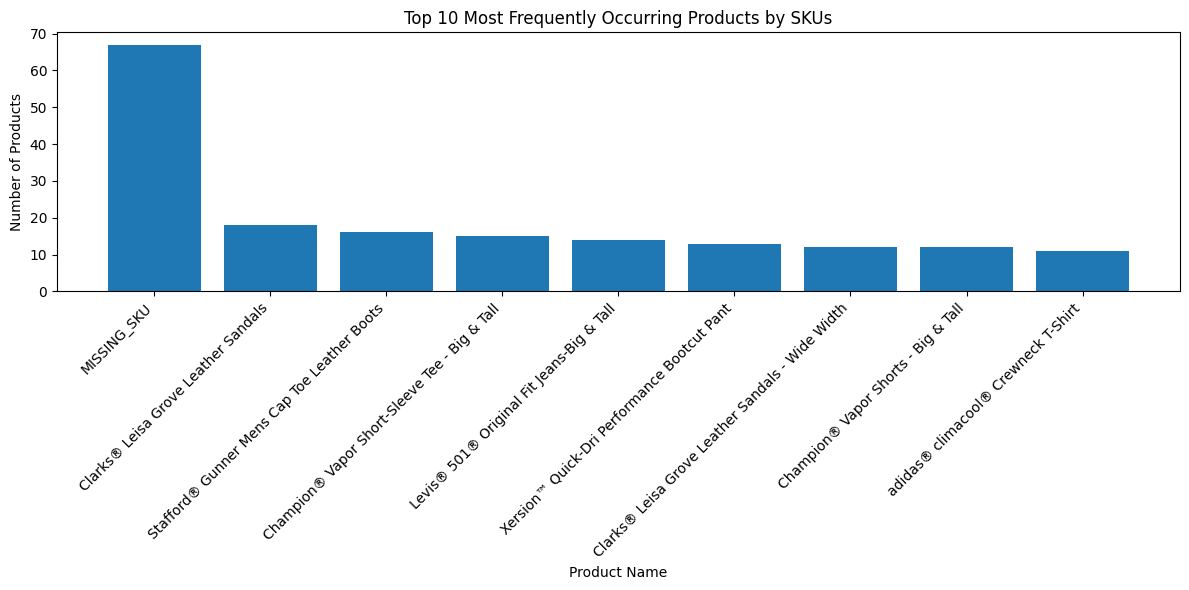

In [116]:
# Distribution of the top 10 most bought SKUs with product names
"""
A bar chart was used because it clearly displays the relative frequency
of product purchases across different SKUs. Since the goal was to identify which
products were bought most often, the bar chart’s categorical
layout allows for easy comparison of counts and highlights standout products at a glance.
"""
plot_top_distribution(
    data=None,
    title='Top 10 Most Frequently Occurring Products by SKUs',
    xlabel='Product Name',
    ylabel='Number of Products',
    is_series=False,
    labels=plot_labels,
    values=top_10_sku_counts.values
)


In [117]:
# Get the counts for the top 10 most frequent product names
top_10_product_name_counts = updated_products['Name'].value_counts().nlargest(10)

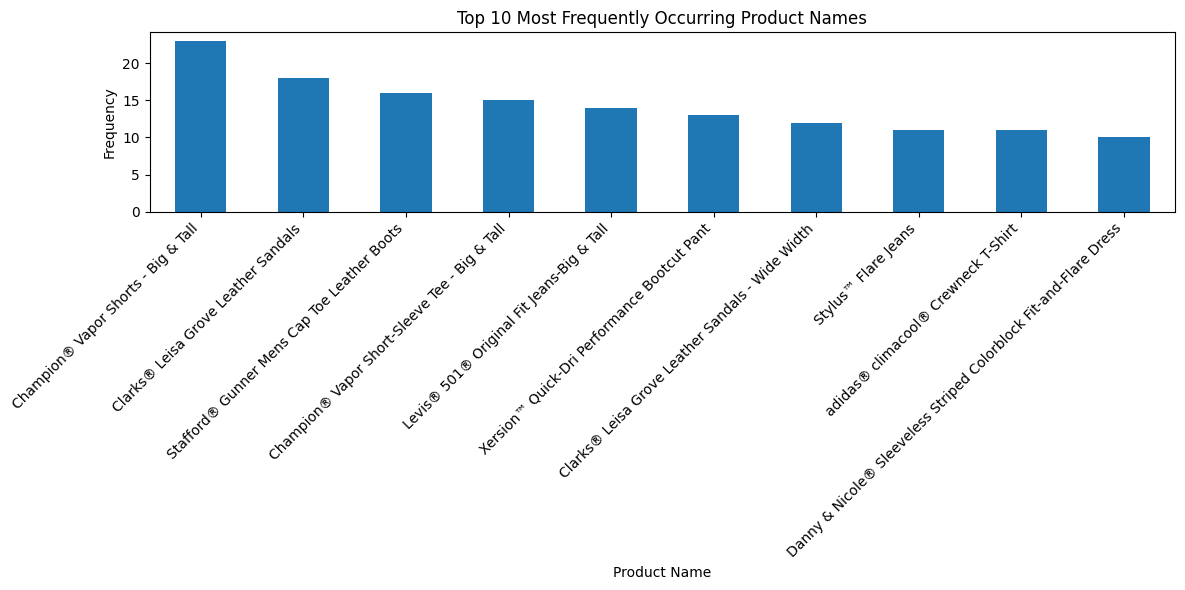

In [118]:
# Plot the distribution of the top 10 most frequent product names
plot_top_distribution(
    data=top_10_product_name_counts,
    title='Top 10 Most Frequently Occurring Product Names',
    xlabel='Product Name',
    ylabel='Frequency'
)

In [119]:
# Adding Sale Price from json to the Products csv
updated_products["Sold for"] = products_json["sale_price"]

In [120]:
# Verifying update
updated_products.head(2)

,Uniq_id,SKU,Name,Description,Price,Av_Score,Sold for
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625,24.16
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000,24.16


In [121]:
#Converting Column values to numeric
converted = pd.to_numeric(updated_products['Sold for'], errors='coerce')

In [122]:
# Identify entries that failed conversion
non_numeric_entries = updated_products.loc[converted.isna(), 'Sold for'].unique().tolist()

In [123]:
# Printing first 5 non_numeric entries
non_numeric_entries[:5]

['12.07-60.42', '30.20-181.28', '34.10-227.40', '30.20-48.33', '14.49-15.70']

In [124]:
# Checking the length of the non numeric entries
len(non_numeric_entries)/len(products)

0.02743673264845903

In [125]:
# Removing rows with non-numeric values in "Sold for" since they are less than 3%
updated_products = updated_products[~updated_products['Sold for'].isin(non_numeric_entries)]

In [126]:
updated_products.isna().sum()

,0
Uniq_id,0
SKU,0
Name,0
Description,301
Price,1905
Av_Score,0
Sold for,0


# Users

In [127]:
# Loading user data
users = pd.read_csv("users.csv")

In [128]:
# Viewing first 3 rows of user data
users.head(3)

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho


In [129]:
users.describe()

,Username,DOB,State
count,5000,5000,5000
unique,4999,52,57
top,dqft3311,07.08.1953,Massachusetts
freq,2,112,107


In [130]:
# Checking the dimensions of the user data
users.shape

(5000, 3)

In [131]:
# Get the value counts for the 'State' column
state_counts = users['State'].value_counts()

In [132]:
# Select the top 20 states
top_n_states = state_counts.head(20)

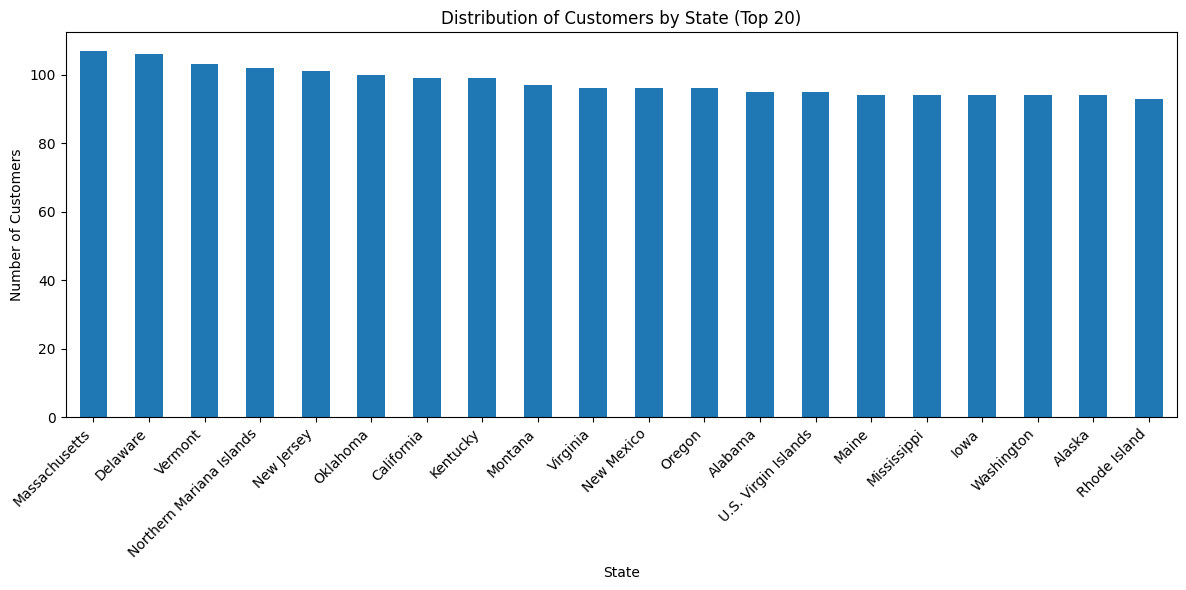

In [133]:
# Checking the distribution of customers by state
plot_top_distribution(
    data=top_n_states,
    title='Distribution of Customers by State (Top 20)',
    xlabel='State',
    ylabel='Number of Customers',
)

In [134]:
# Making a copy of the user data
updated_users = users.copy()

In [135]:
# Convert the 'DOB' column to datetime objects
# Use dayfirst=True to correctly parse the date format 'dd.mm.yyyy'
updated_users['DOB'] = pd.to_datetime(updated_users['DOB'], format='%d.%m.%Y', errors='coerce')

In [136]:
# Calculate the current date
current_date = pd.to_datetime('today')

In [137]:
# Calculate the age
# Subtract the birth year from the current year
updated_users['Age'] = (current_date.year - updated_users['DOB'].dt.year)

In [138]:
# Adjust age for birthdays that haven't happened yet this year
# Apply the adjustment logic to each row
updated_users['Age'] = updated_users.apply(lambda row: row['Age'] - ((current_date.month < row['DOB'].month) |
                                                    ((current_date.month == row['DOB'].month) &
                                                     (current_date.day < row['DOB'].day))) if pd.notna(row['DOB']) else row['Age'], axis=1)

In [139]:
# Viewing first 3 rows
updated_users.head(3)

,Username,DOB,State,Age
0,bkpn1412,1983-07-31,Oregon,42
1,gqjs4414,1998-07-27,Massachusetts,27
2,eehe1434,1950-08-08,Idaho,75


In [140]:
# Checking for null values
updated_users.isna().sum()

,0
Username,0
DOB,0
State,0
Age,0


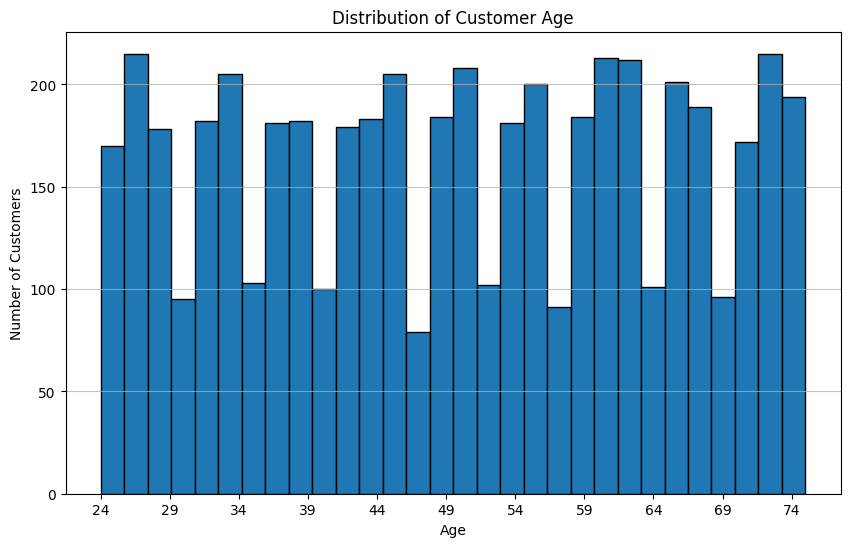

In [141]:
# Finding the distribution of customer age
plt.figure(figsize=(10, 6))
plt.hist(updated_users['Age'], bins=30, edgecolor='black')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', alpha=0.75)

# Set x-axis ticks from 0 to 100 in steps of 10
plt.xticks(np.arange(min(updated_users["Age"]), max(updated_users["Age"]), 5));

The users data can give more insights with the help of the reviews data. I would load that as well


In [142]:
# Load the reviews data
reviews = pd.read_csv("reviews.csv")

In [143]:
reviews.isna().sum()

,0
Uniq_id,0
Username,0
Score,0
Review,0


In [147]:
# Merge users and reviews dataframes on Username
merged_user_reviews = pd.merge(updated_users, reviews, on='Username', how='inner')

In [148]:
# Define age groups
age_bins = [24, 34, 44, 54, 64, 74]
age_labels = ['24-34', '35-44', '45-54', '55-64', '65-74']

In [149]:
# Create a new column 'Age_Group'
merged_user_reviews['Age_Group'] = pd.cut(merged_user_reviews['Age'], bins=age_bins, labels=age_labels, right=False)

In [150]:
# Merge merged_user_reviews with updated_products to get product names
merged_data_with_names = pd.merge(merged_user_reviews, updated_products[['Uniq_id', 'Name']], on='Uniq_id', how='left')

Most frequently reviewed product names by Age Group:

Age Group: 24-34
Top 10 Products:

Age Group: 35-44
Top 10 Products:

Age Group: 45-54
Top 10 Products:

Age Group: 55-64
Top 10 Products:

Age Group: 65-74
Top 10 Products:


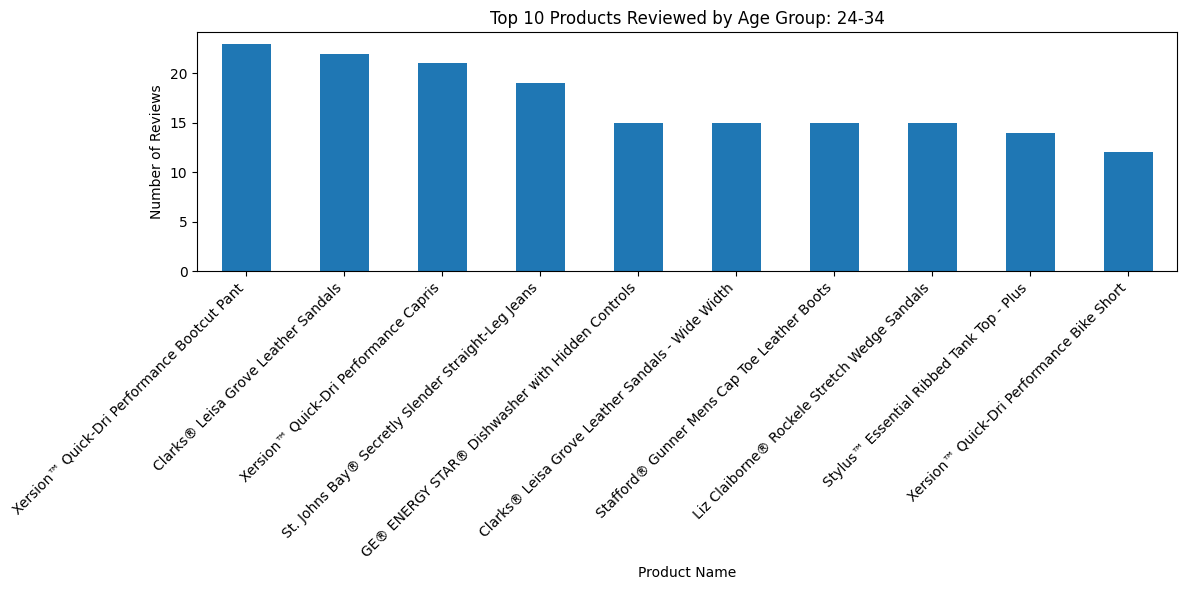

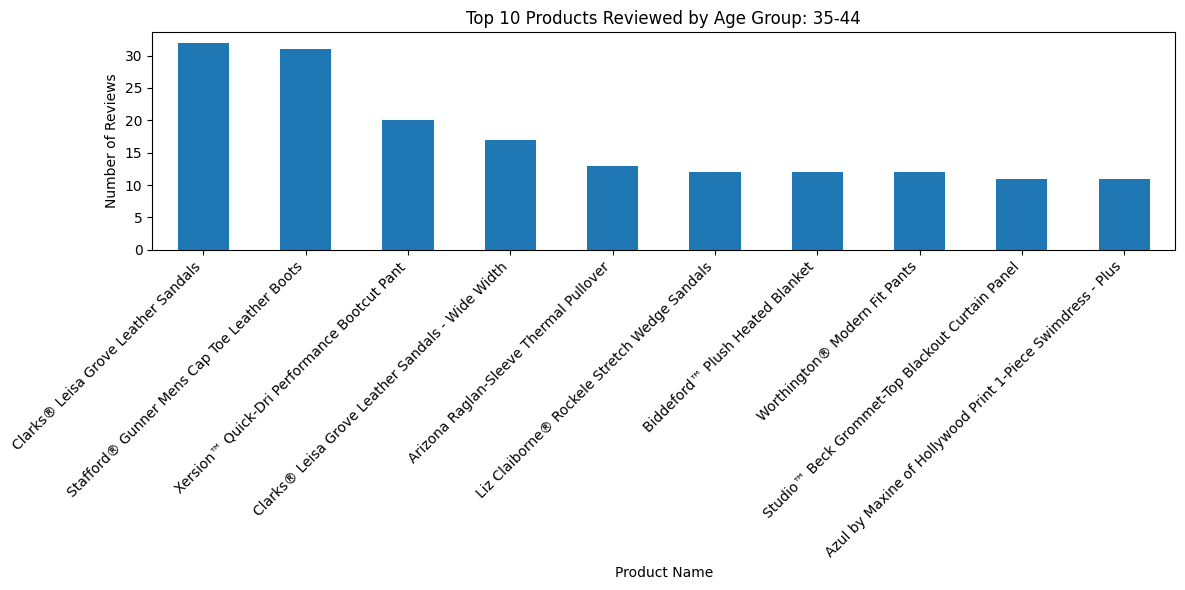

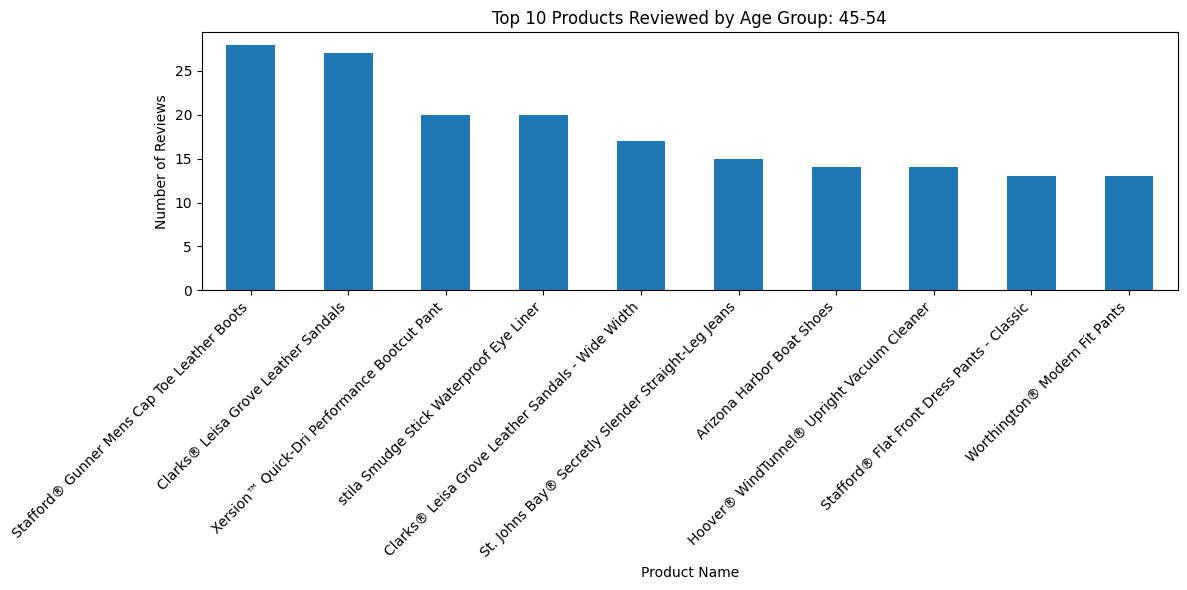

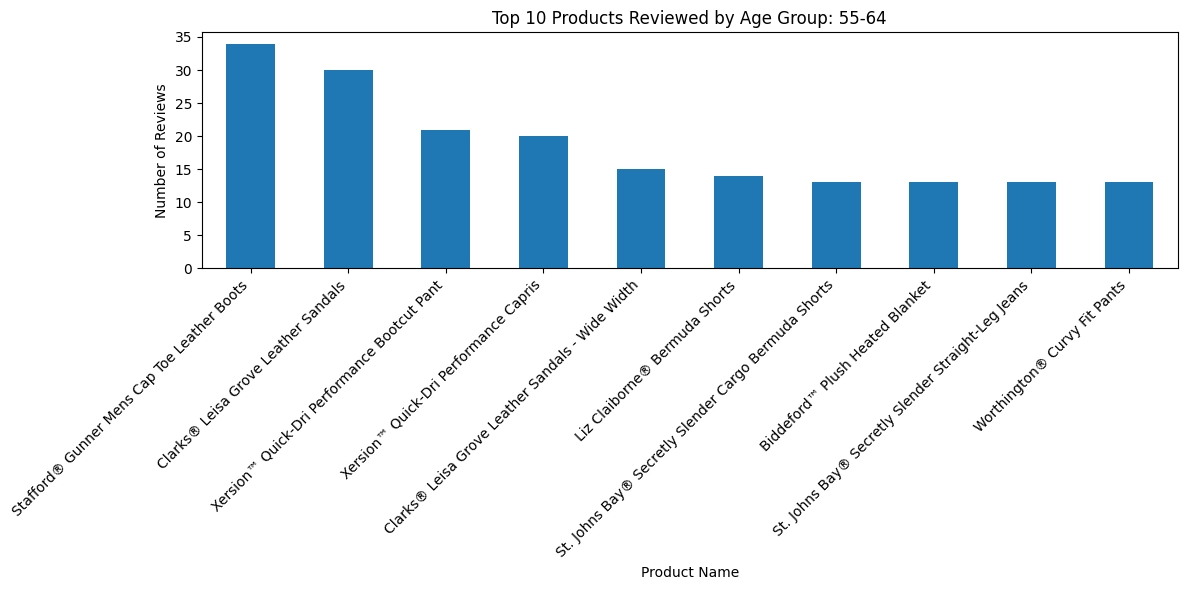

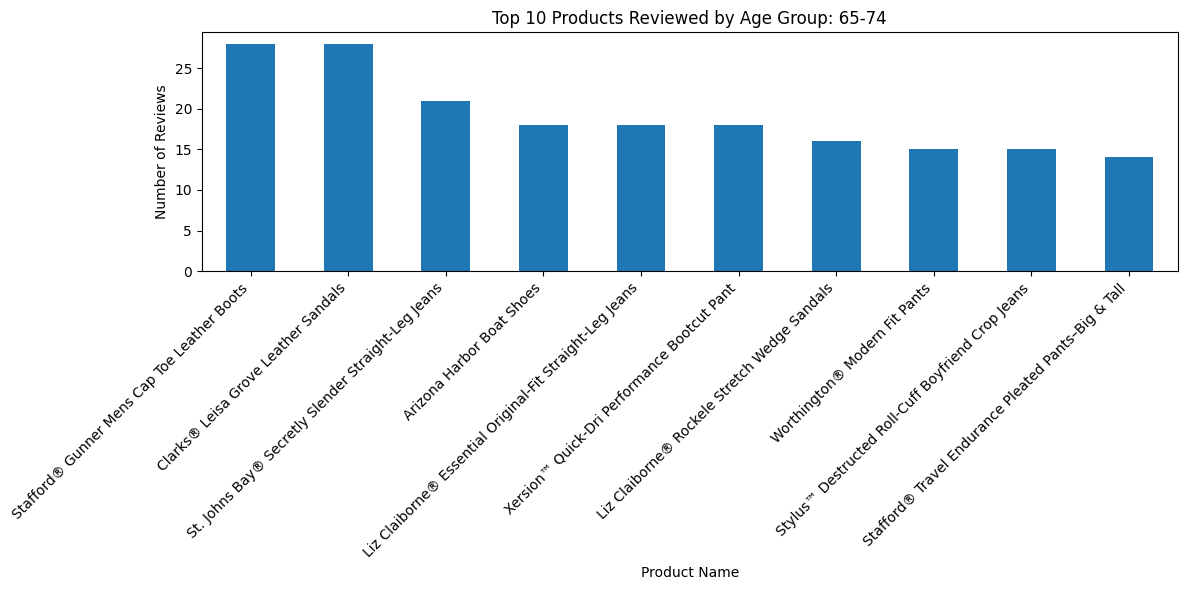

In [151]:
# Analyze the most frequent product names within each age group
for age_group in age_labels:
    # Filter data for the current age group
    age_group_data = merged_data_with_names[merged_data_with_names['Age_Group'] == age_group]

    # Count the occurrences of each product name in this age group
    product_name_counts = age_group_data['Name'].value_counts()

    print(f"\nAge Group: {age_group}")

    if not product_name_counts.empty:

        # Plot the top 10 most frequent product names for this age group
        plot_top_distribution(
        data= product_name_counts.head(10),
        title=f'Top 10 Products Reviewed by Age Group: {age_group}',
        xlabel='Product Name',
        ylabel='Number of Reviews',
        )

    else:
        print("No reviews for this age group.")

In [ ]:
# Iterate through the 'category' column in the products_json DataFrame
all_categories = [
    'Uncategorised' if (not c or pd.isna(c)) else c
    for category_list in products_json['category']
    for c in (
        category_list if isinstance(category_list, list)
        else [category_list] if isinstance(category_list, str)
        else [None]
    )
]

In [ ]:
# Count the occurrences of each category
category_counts = pd.Series(all_categories).value_counts()

In [ ]:
# Get the top 50 most frequent categories
top_20_categories = category_counts.head(20)

In [ ]:
# Plot the top 20 most frequently bought categories
plot_top_distribution(
data= top_20_categories,
title='Top 20 Most Frequently Bought Categories',
xlabel='Category',
ylabel = 'Number of Products',
)

# This will be done later

In [ ]:
# Filter the updated_products DataFrame to include only the top 10 product names
top_10_products_df = updated_products[updated_products['Name'].isin(plot_labels)].copy()

# Merge with the products_json DataFrame to get the brand information
merged_top_products = pd.merge(top_10_products_df, products_json[['uniq_id', 'brand']], left_on='Uniq_id', right_on='uniq_id', how='left')

# Count the occurrences of each brand within the top 10 products
top_brand_counts = merged_top_products['brand'].value_counts()

# Get the top 3 brands
top_3_brands = top_brand_counts.head(3)

print("Top 3 brands among the top 10 most occurring products:")
display(top_3_brands)